
5. Statistics about the interest of people joining Dating Apps.


In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
file1 = '/content/drive/MyDrive/Dating App Dataset/users_api-results.csv'
users_instances = pd.read_csv(file1)
users_instances

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,1,2015-04-07T00:08:59Z,1.428365e+09,0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3969,F,M,20,Ma**e,1.00,8,1014,43,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3970,F,M,20,Ma**e,1.00,8,1101,46,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,0,2015-04-06T15:47:15Z,1.428335e+09,0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN


In [66]:
users_instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

In [67]:
users_instances = users_instances.query('age not in [18, 27, 28]')

In [68]:
import numpy as np

def safe_divide_vectorized(numerator, denominator):
    return np.where(
        (numerator == 0) & (denominator == 0), 0,np.where(denominator == 0, 0, numerator / denominator))

users_instances["engagement_rate"] = np.round(
    safe_divide_vectorized(
        users_instances["counts_kisses"] + users_instances["counts_fans"],
        users_instances["counts_profileVisits"]
    ),
    2
)
users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")

users_instances["picture_effectiveness"] = np.round(
    safe_divide_vectorized(
        (users_instances["counts_kisses"] + users_instances["counts_fans"] ) ,
        users_instances["counts_pictures"]
        ),
   2)

users_instances["engagement_rate"] = pd.to_numeric(users_instances["engagement_rate"], errors="coerce")
users_instances["picture_effectiveness"] = pd.to_numeric(users_instances["picture_effectiveness"], errors="coerce")
users_instances["charisma_score"] = round(
    ((users_instances["engagement_rate"] * 0.6) + (users_instances["picture_effectiveness"] * 0.4)) / 2, 2
)

users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()
charismatic_users = users_instances[users_instances['is_charismatic'] == True]
non_charismatic_users = users_instances[users_instances['is_charismatic'] == False]

<ipython-input-68-4953c3065480>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = np.round(
<ipython-input-68-4953c3065480>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")
<ipython-input-68-4953c3065480>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

# OverAll Users



```
# Gender and Preferences:
```




### Gender and GenderLooking Correlation ###
genderLooking   F     M  both  none
gender                             
F              25  3560    19   366

### Gender and GenderLooking Correlation (Percentage) ###
genderLooking         F          M      both      none
gender                                                
F              0.629723  89.672544  0.478589  9.219144


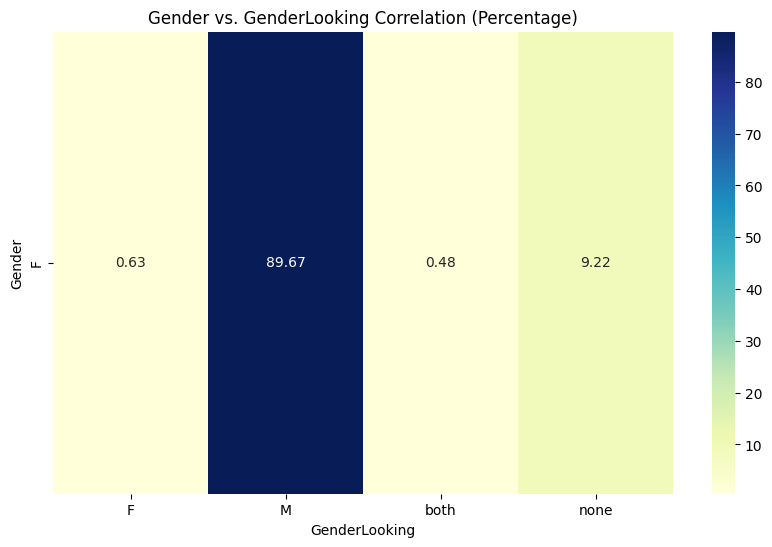

In [69]:

gender_correlation = pd.crosstab(users_instances['gender'], users_instances['genderLooking'])

gender_correlation_percentage = gender_correlation.div(gender_correlation.sum(axis=1), axis=0) * 100

print("\n### Gender and GenderLooking Correlation ###")
print(gender_correlation)
print("\n### Gender and GenderLooking Correlation (Percentage) ###")
print(gender_correlation_percentage)

# Visualizing the correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gender_correlation_percentage, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Gender vs. GenderLooking Correlation (Percentage)")
plt.xlabel("GenderLooking")
plt.ylabel("Gender")
plt.show()

- Overall Users tend to look for Male partner unlike charismatic users



```
# What are the most common age groups of users (age)?
```




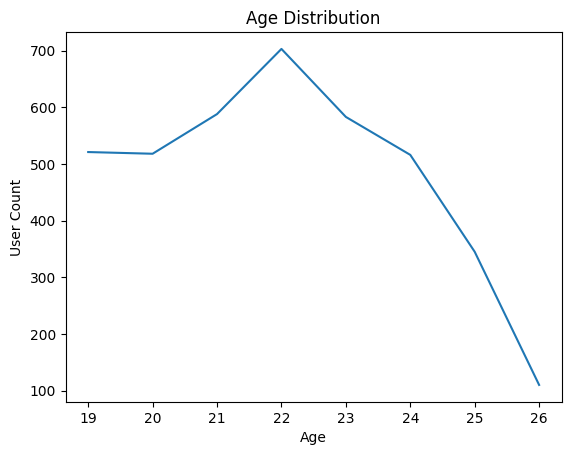

In [70]:
age_distribution_data = users_instances.groupby('age')['userId'].count()
age_distribution_data
plt.plot(age_distribution_data.index, age_distribution_data.values)
plt.xlabel('Age')
plt.ylabel('User Count')
plt.title('Age Distribution')
plt.show()

- There are large number of users with age group 19 -23



```
# Is there a correlation between age and user interests  (e.g., flirtInterests_chat, flirtInterests_friends, flirtInterests_date)?
```



<ipython-input-71-9dcb359ca9ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances[col] = users_instances[col].astype(int)
<ipython-input-71-9dcb359ca9ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances[col] = users_instances[col].astype(int)
<ipython-input-71-9dcb359ca9ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

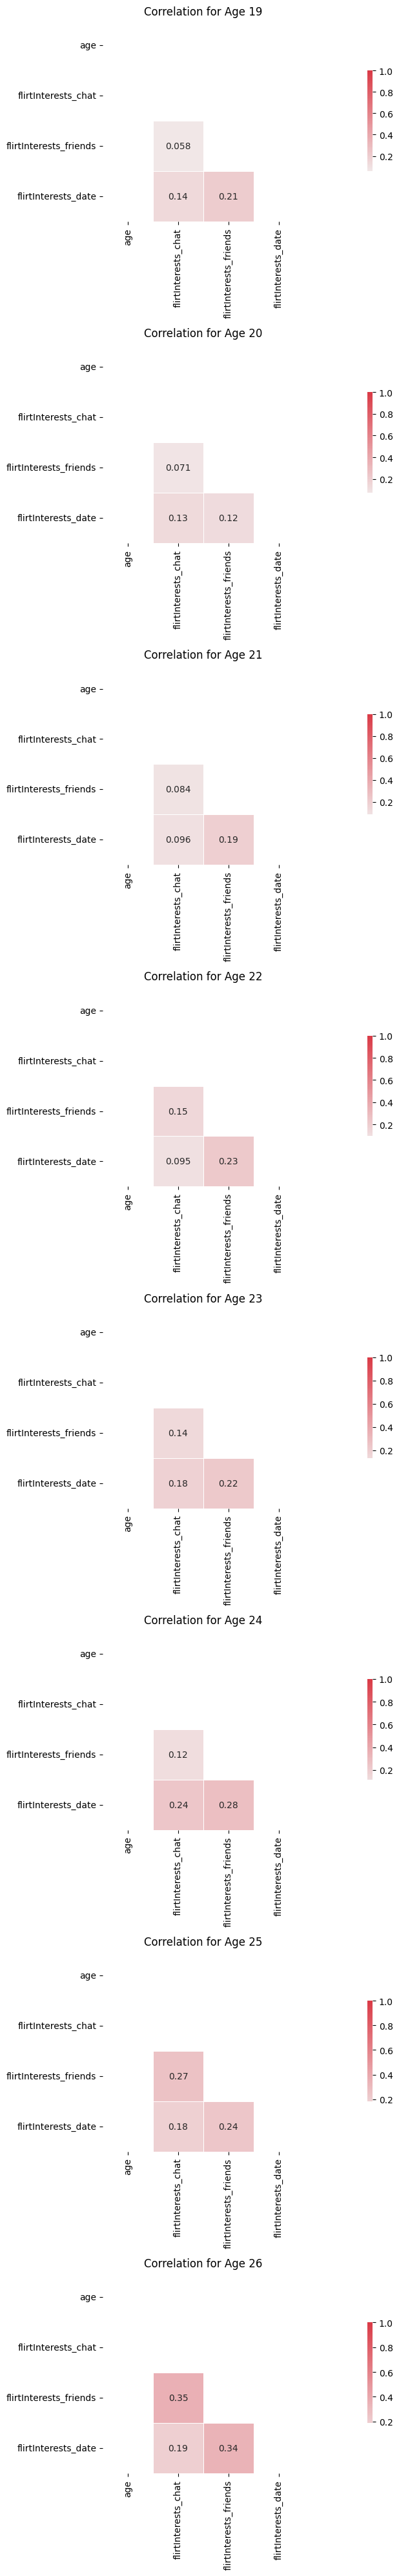

In [71]:
import numpy as np

columns_of_interest = ['age', 'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']
for col in ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']:
    if users_instances[col].dtype == 'bool':
        users_instances[col] = users_instances[col].astype(int)

users_instances_clean = users_instances.dropna(subset=columns_of_interest)

unique_ages = sorted(users_instances_clean['age'].unique())

plt.figure(figsize=(20, 40))

for idx, age in enumerate(unique_ages):
    data_age_group = users_instances_clean[users_instances_clean['age'] == age]
    correlation_matrix = data_age_group[columns_of_interest].corr()
    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plt.subplot(len(unique_ages), 1, idx + 1)
    sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0, square=True,
                annot=True, linewidths=.5, cbar_kws={'shrink': .5})
    plt.title(f"Correlation for Age {age}")

plt.tight_layout()
plt.show()


1. We can clearly see that users with less age group tend to chat and make friends but often less to interested in dating
2. Whereas older users in age who are interested in chat tend to show more interest in dating and they do not directly tend to chat and go for dating but they follow path of chatting then friends and then dating



```
# From which countries (country) are users joining?
```



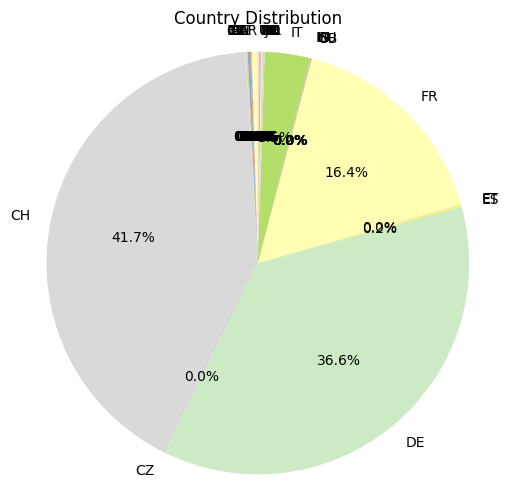

In [72]:

country_distribution = users_instances.groupby('country')['userId'].count()
plt.figure(figsize=(6, 6))
plt.pie(
    country_distribution.values,
    labels=country_distribution.index,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',  # Show percentage only if it's > 0
    startangle=90,
    colors=sns.color_palette("Set3", len(country_distribution))
)
plt.title('Country Distribution')
plt.axis('equal')
plt.show()

- User living in country CH is of 41%

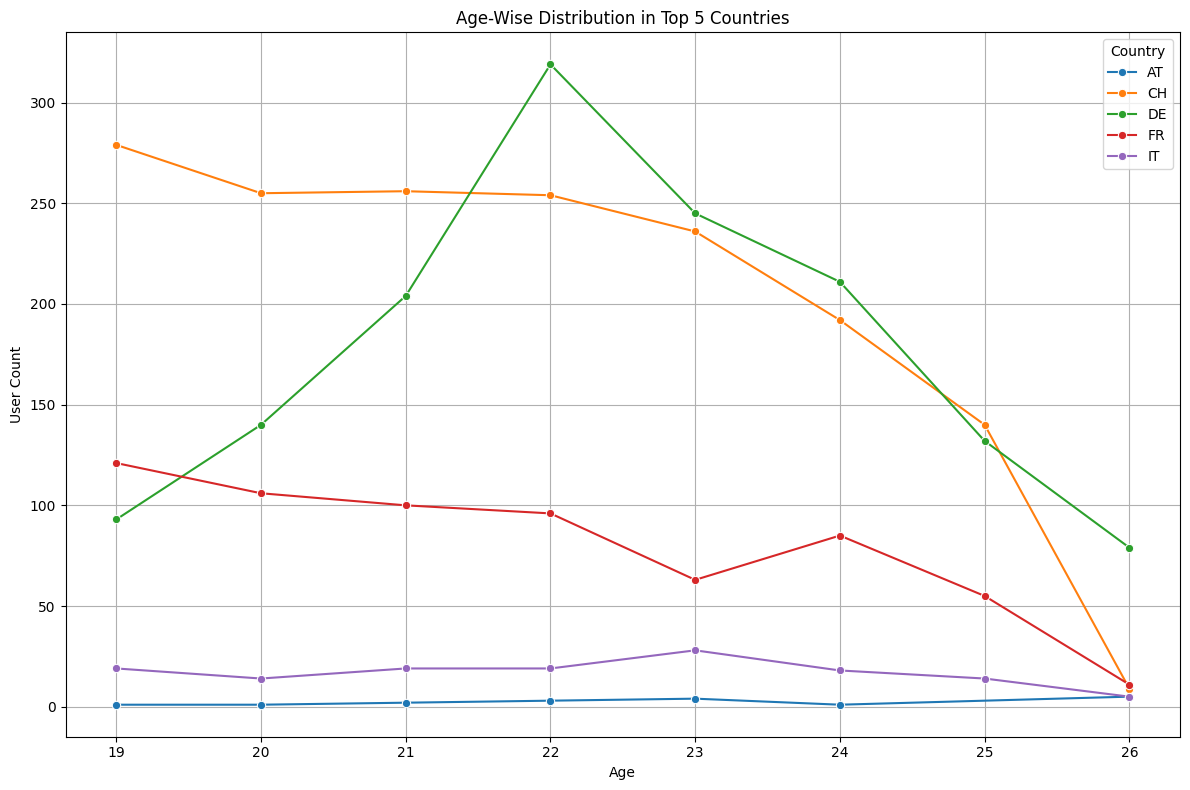

In [73]:
# Step 1: Identify the top 5 countries by user count
top_countries = (
    users_instances.groupby('country')['userId']
    .count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 2: Filter the data for the top 5 countries
filtered_data = users_instances[users_instances['country'].isin(top_countries)]

# Step 3: Group by age and country to get the user count
age_country_distribution = (
    filtered_data.groupby(['age', 'country'])['userId']
    .count()
    .reset_index()
    .rename(columns={'userId': 'User Count'})
)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=age_country_distribution,
    x='age',
    y='User Count',
    hue='country',
    marker='o'
)
plt.title('Age-Wise Distribution in Top 5 Countries')
plt.xlabel('Age')
plt.ylabel('User Count')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


- People of age 22 is more from Country DE

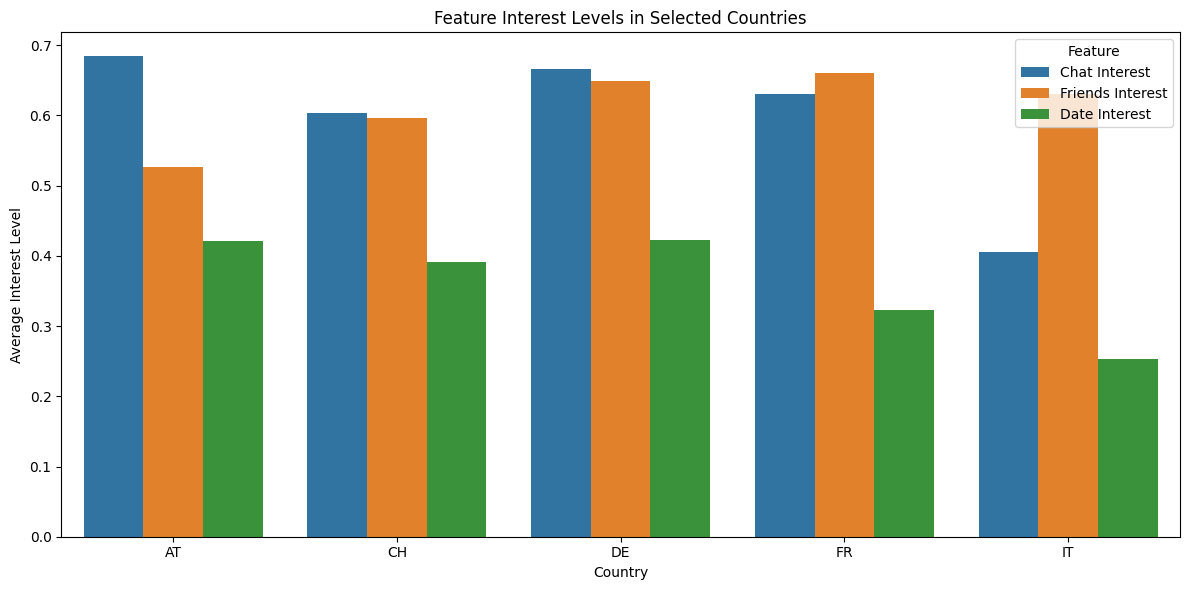

In [74]:
# Are users from specific regions more active or interested in certain features?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features of interest
features_of_interest = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']

# Ensure the features are numeric (if they are boolean, convert to int)
for feature in features_of_interest:
    if users_instances[feature].dtype == 'bool':
        users_instances[feature] = users_instances[feature].astype(int)

# Step 1: Filter for selected countries
selected_countries = ['AT', 'CH', 'DE', 'FR', 'IT']
filtered_data = users_instances[users_instances['country'].isin(selected_countries)]

# Step 2: Aggregate data by country
region_feature_interest = (
    filtered_data.groupby('country')[features_of_interest]
    .mean()
    .reset_index()
    .rename(columns={
        'flirtInterests_chat': 'Chat Interest',
        'flirtInterests_friends': 'Friends Interest',
        'flirtInterests_date': 'Date Interest'
    })
)

# Step 3: Reshape for Visualization
region_feature_interest_melted = region_feature_interest.melt(
    id_vars='country',
    var_name='Feature',
    value_name='Interest Level'
)

# Step 4: Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_feature_interest_melted,
    x='country',
    y='Interest Level',
    hue='Feature'
)
plt.title('Feature Interest Levels in Selected Countries')
plt.xlabel('Country')
plt.ylabel('Average Interest Level')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()


- Users from AT are most engaged with Chat Interest, while DE and FR prioritize Friends Interest.
IT shows lower engagement across all features, particularly for Date Interest.

In [75]:
country_IT_df = users_instances[users_instances['country'] == 'IT']
IT_country_distribution_agewise = country_IT_df.groupby('age')['userId'].count()
IT_country_distribution_agewise

,userId
age,
19,19
20,14
21,19
22,19
23,28
24,18
25,14
26,5


-The elder one are more in number in country IT and thats what made them less interest in Dating



```
# What percentage of users are interested in chat, friends, or date?**
```



In [76]:

interest_columns = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']
for col in interest_columns:
    if users_instances[col].dtype == 'bool':
        users_instances[col] = users_instances[col].astype(int)


interest_percentages = users_instances[interest_columns].mean() * 100
print("Interest Percentages:\n", interest_percentages)


Interest Percentages:
 flirtInterests_chat       62.594458
flirtInterests_friends    62.720403
flirtInterests_date       38.740554
dtype: float64


- There is almost 63% of users wants to be a friends


```
# How do interests vary based on age
```



Interests by Age:
      flirtInterests_chat  flirtInterests_friends  flirtInterests_date
age                                                                  
19             65.774379               62.523901            34.225621
20             67.557252               64.885496            37.213740
21             64.013267               63.018242            35.655058
22             59.861111               60.555556            40.277778
23             59.696459               64.755481            39.460371
24             61.048689               61.423221            39.700375
25             60.112360               62.359551            44.382022
26             64.957265               62.393162            47.008547


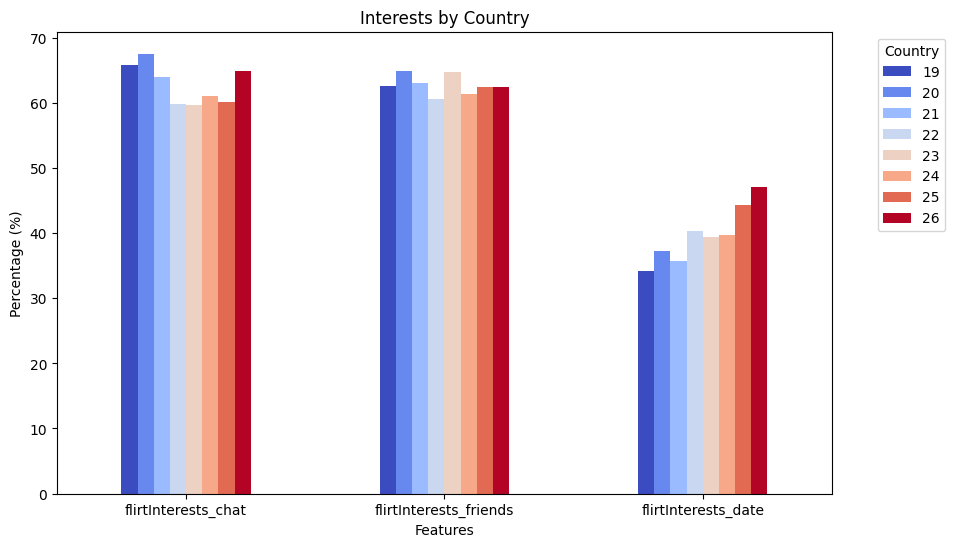

In [77]:
age_interest = users_instances.groupby('age')[interest_columns].mean() * 100
print("Interests by Age:\n", age_interest)
age_interest.T.plot(kind='bar', figsize=(10, 6), cmap='coolwarm')
plt.title("Interests by Country")
plt.ylabel("Percentage (%)")
plt.xlabel("Features")
plt.xticks(rotation=0)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- On an average older users tend to show more interest in dating and it also got clear that each age group wants chats



```
# Are users with isVIP traits more likely to have particular interests?
```



In [78]:

traits_columns = ['isVip']
for trait in traits_columns:
    trait_interest = users_instances.groupby(trait)[interest_columns].mean() * 100
    print(f"Interests by {trait}:\n", trait_interest)


Interests by isVip:
        flirtInterests_chat  flirtInterests_friends  flirtInterests_date
isVip                                                                  
0                62.567672               62.670791            38.747100
1                63.736264               64.835165            38.461538


- There is not much difference in vip and non vip users interest

In [79]:
vip_users = users_instances[users_instances['isVip'] == 1]
age_vs_isvip = vip_users.groupby('age')['userId'].count() * 100
age_vs_isvip

,userId
age,
19,2300
20,1200
21,900
22,1300
23,1300
24,1200
25,700
26,100





- We see vip are mostly younger users






```
# What are the primary languages (lang_*) spoken by users, and how does language preference correlate with flirt interests?
```



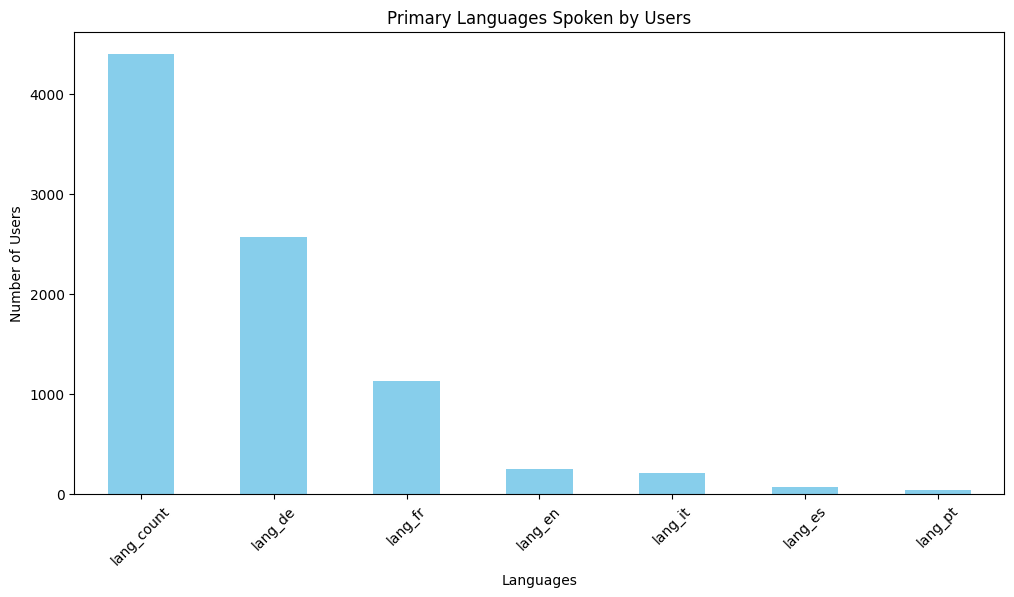

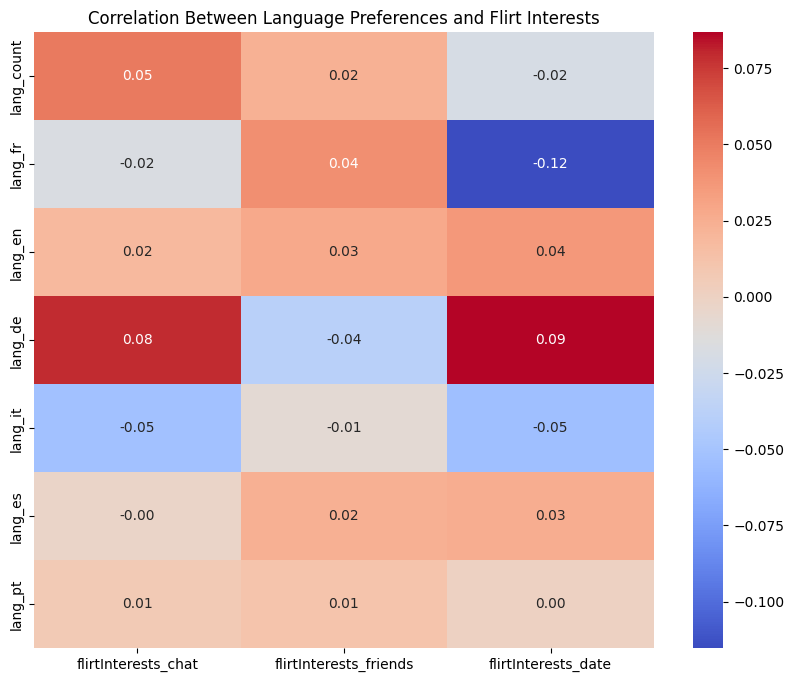

In [80]:
language_columns = [col for col in users_instances.columns if col.startswith('lang_')]

language_distribution = users_instances[language_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
language_distribution.plot(kind='bar', color='skyblue')
plt.title("Primary Languages Spoken by Users")
plt.xlabel("Languages")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

flirt_columns = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']
for col in flirt_columns:
    if users_instances[col].dtype == 'bool':
        users_instances[col] = users_instances[col].astype(int)

language_flirt_data = users_instances[language_columns + flirt_columns]
correlation_matrix = language_flirt_data.corr()
language_flirt_correlation = correlation_matrix.loc[language_columns, flirt_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(language_flirt_correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Between Language Preferences and Flirt Interests")
plt.show()


- We can see user who speak more of lang DE are tend to be interested in chat and date



```
# What percentage of users have provided a free-text description (freetext) or status update (whazzup)?
```



In [81]:
total_users = len(users_instances)

freetext_percentage = (users_instances['freetext'].notnull().sum() / total_users) * 100
whazzup_percentage = (users_instances['whazzup'].notnull().sum() / total_users) * 100

print(f"Percentage of users with a free-text description: {freetext_percentage:.2f}%")
print(f"Percentage of users with a status update (whazzup): {whazzup_percentage:.2f}%")

Percentage of users with a free-text description: 2.82%
Percentage of users with a status update (whazzup): 60.20%


- Users are almost 60% with status Update, while free-text description are of 2%

In [82]:
average_distance = round(users_instances['distance'].mean(),2)
print("Average Distance:")
print(average_distance)

Average Distance:
206.96


<ipython-input-83-c0a1d898771a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['distance_bucket'] = pd.cut(users_instances['distance'], bins=distance_bins, labels=distance_labels, include_lowest=True)
<ipython-input-83-c0a1d898771a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_analysis = users_instances.groupby('distance_bucket').agg({


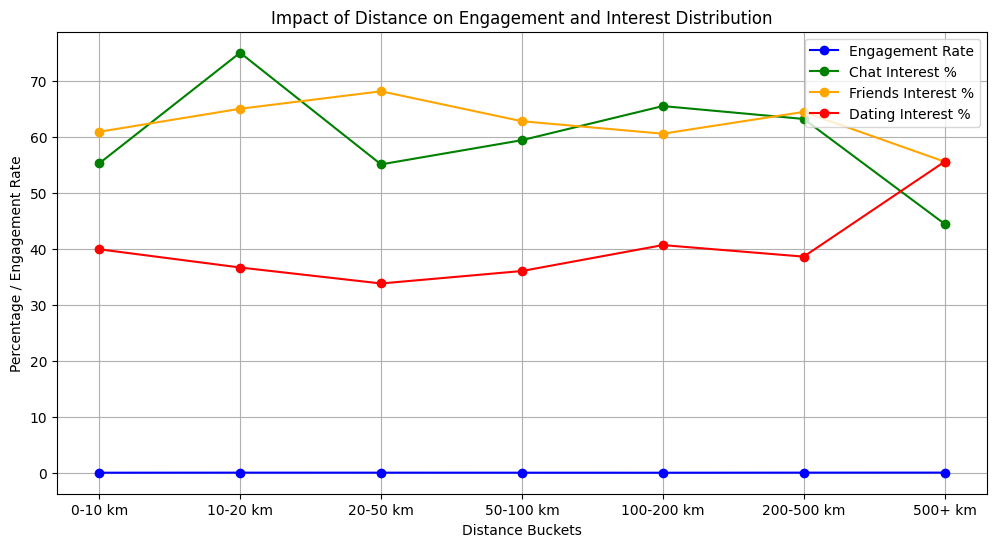

,distance_bucket,engagement_rate,flirtInterests_chat,flirtInterests_friends,flirtInterests_date
0,0-10 km,0.045282,55.241935,60.887097,39.919355
1,10-20 km,0.054500,75.000000,65.000000,36.666667
2,20-50 km,0.051981,55.072464,68.115942,33.816425
3,50-100 km,0.047631,59.390863,62.774958,36.040609
4,100-200 km,0.041161,65.477997,60.546282,40.667678
5,200-500 km,0.057278,63.178808,64.437086,38.609272
6,500+ km,0.062222,44.444444,55.555556,55.555556


In [83]:

distance_bins = [0, 10, 20, 50, 100, 200, 500, np.inf]
distance_labels = ['0-10 km', '10-20 km', '20-50 km', '50-100 km', '100-200 km', '200-500 km', '500+ km']
users_instances['distance_bucket'] = pd.cut(users_instances['distance'], bins=distance_bins, labels=distance_labels, include_lowest=True)


distance_analysis = users_instances.groupby('distance_bucket').agg({
    'engagement_rate': 'mean',
    'flirtInterests_chat': 'mean',
    'flirtInterests_friends': 'mean',
    'flirtInterests_date': 'mean'
}).reset_index()

distance_analysis[['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']] *= 100

plt.figure(figsize=(12, 6))
plt.plot(distance_analysis['distance_bucket'], distance_analysis['engagement_rate'], label='Engagement Rate', marker='o', color='blue')

plt.plot(distance_analysis['distance_bucket'], distance_analysis['flirtInterests_chat'], label='Chat Interest %', marker='o', color='green')
plt.plot(distance_analysis['distance_bucket'], distance_analysis['flirtInterests_friends'], label='Friends Interest %', marker='o', color='orange')
plt.plot(distance_analysis['distance_bucket'], distance_analysis['flirtInterests_date'], label='Dating Interest %', marker='o', color='red')

# Customize plot
plt.title('Impact of Distance on Engagement and Interest Distribution')
plt.xlabel('Distance Buckets')
plt.ylabel('Percentage / Engagement Rate')
plt.legend()
plt.grid(True)
plt.show()

distance_analysis


- Engagement increases with distance
- Interest in chat varies by distance
- Friendship is consistent across distances
- Dating interest rises with distance

# **Conclusion**





User Demographics and Preferences

1. Gender Preferences:
  -  Majority of users look for male partners, regardless of user charisma.

2. Age Distribution:
  -  A significant proportion of users are aged 19–23, with age 22 being prominent in Country DE.

3. Age and Interest Patterns:

  - Younger users are more likely to engage in chatting and making friends, but show lower interest in dating.
  - Older users are more inclined toward dating, often following a progression: Chat → Friends → Dating.

4. Country Trends:
  - CH users dominate the platform (41%), while users from AT show the highest engagement in chat.
  - FR and DE users prioritize making friends, while IT users, being older, show low engagement, especially in dating.


User Behavior and Feature Usage

1. Friendship and Chatting Trends:

  - Approximately 63% of users are interested in making friends.
Users who speak DE are most interested in chat and dating.

2. Profile Customization:
  - About 60% of users update their status, but only 2% provide free-text descriptions.

3. VIP vs Non-VIP Users:
  - No major differences in interests between VIP and non-VIP users, but VIP users tend to be younger.


Engagement Patterns

1. Distance and Engagement:
  - Engagement increases with distance, with the highest engagement observed for users 500+ km away.
  - Interest in chatting declines at long distances, while dating interest rises.

2. Interest Consistency:
 - Friendship interest remains steady across distances.

3. Average Engagement:
  - The average engagement is 206.96 km, with VIP and non-VIP users showing similar engagement patterns.


**`Tips for you`**

1. Personalize Your Profile:
  - Add a unique free-text description and keep your status updated to stand out. Profiles with personalized details get more attention.
2. Be Active:
   - Engagement grows with activity! Respond to messages, explore new connections, and stay online to boost visibility.
3. Leverage Distance:
   - Don’t shy away from long-distance connections – they often lead to higher engagement and dating interest.
4. Focus on Friendships First:
   - Many users follow the progression of Chat → Friends → Dating, so build a solid foundation before rushing into dating.
5. Know Your Audience:
   - Younger users are more into chatting, while older users prefer dating. Adjust your approach based on your match's age and interests.
6. Engage Locally:
   - If you're near active regions like CH or DE, expect vibrant friend-focused communities. Adjust your expectations in quieter areas like IT.
7. Stay Authentic:
   - Honesty and showing your true self resonate more than flashy profiles. A genuine approach builds meaningful connections.